In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics.cluster import adjusted_rand_score


In [2]:
attribute_pangolin = np.load("/ICCABS/Code/kmers/Attributes_kmers_Short_Reads_6812.npy",allow_pickle=True)
# attribute_one_hot = np.load("/ICCABS/Code/OHE/Reduced_Attributes_One_Hot.npy",allow_pickle=True)

In [3]:
attribute_kmeans_kmers = np.load("/ICCABS/Results/kMeans/new_Labels_kmeans_kmers.npy",allow_pickle=True)
attribute_kmeans_minimizer = np.load("/ICCABS/Results/kMeans/new_Labels_kmeans_minimizer.npy",allow_pickle=True)
attribute_kmeans_onehot = np.load("/ICCABS/Results/kMeans/new_Labels_kmeans_one_hot.npy",allow_pickle=True)

In [4]:
len(attribute_kmeans_kmers) , len(attribute_pangolin), len(attribute_kmeans_minimizer) , len(attribute_kmeans_onehot)

(6812, 6812, 6812, 6812)

In [5]:
np.unique(attribute_kmeans_kmers), np.unique(attribute_kmeans_minimizer), np.unique(attribute_kmeans_onehot)

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

In [8]:
adjusted_rand_score(attribute_pangolin, attribute_kmeans_kmers)

0.03146962783888107

In [9]:
adjusted_rand_score(attribute_kmeans_kmers,attribute_pangolin)

0.03146962783888107

In [10]:
adjusted_rand_score(attribute_pangolin, attribute_kmeans_minimizer)

0.027273265558733165

In [11]:
adjusted_rand_score(attribute_pangolin, attribute_kmeans_onehot)

0.2532946363796935

In [12]:
adjusted_rand_score(attribute_kmeans_kmers, attribute_kmeans_minimizer)

0.6206804256735932

In [3]:
ari_score = np.matrix([
[1, 0.2532946364, 0.03146962784, 0.02727326556],
[0.2532946364, 1, 0.03826497938, 0.04555947456],
[0.03146962784, 0.03826497938, 1, 0.6206804257],
[0.02727326556, 0.04555947456, 0.6206804257, 1]
])


In [4]:
ari_score

matrix([[1.        , 0.25329464, 0.03146963, 0.02727327],
        [0.25329464, 1.        , 0.03826498, 0.04555947],
        [0.03146963, 0.03826498, 1.        , 0.62068043],
        [0.02727327, 0.04555947, 0.62068043, 1.        ]])

In [127]:
def plot_heatmap(hm_matrix, axis_labels, title, outfile=None):
    import seaborn as sns
    import matplotlib.pyplot as plt

    hm_matrix = np.transpose(hm_matrix)

    mask = np.zeros_like(hm_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    for i in range(mask.shape[0]):
        mask[i,i] = False

    f, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(hm_matrix, cmap="Greens", mask=mask, vmin=0, center=0,
            square=True, 
            linewidths=.5, 
            # cbar_kws={"shrink": .5},
            annot=True, fmt='.2f', 
            annot_kws={"size": 24})
    
    ax.collections[0].colorbar.ax.tick_params(labelsize=26)
    
    ax.set_xticklabels(axis_labels,rotation=70, fontsize = 22)
    ax.set_yticklabels(axis_labels, fontsize = 22)
  
    
    plt.yticks(rotation=0)
    

#     plt.title(title, fontsize = 24)

    plt.tight_layout()
    if outfile:
        plt.savefig(outfile)
    # plt.show()

In [129]:
axis_labels = ['Pangolin', 'Kmeans OHE', 'Kmeans kmer', 'Kmeans Mini'] 

In [130]:
file = "C:/Users/pchourasia1/Desktop/Spring Research 2022/ICCABS/Results/Adjusted_Rand_Index_test.png"

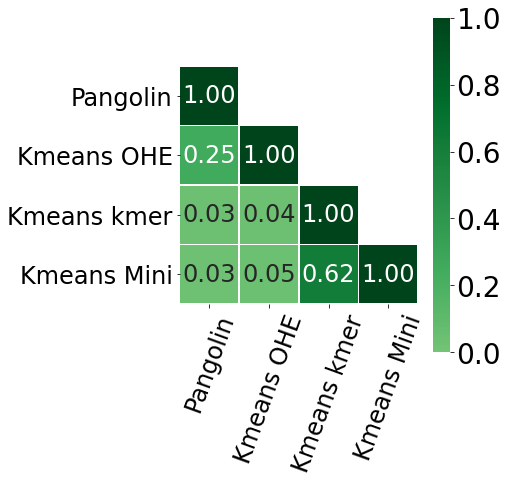

In [131]:
plot_heatmap(ari_score, axis_labels, 'Adjusted Rand Index', file)

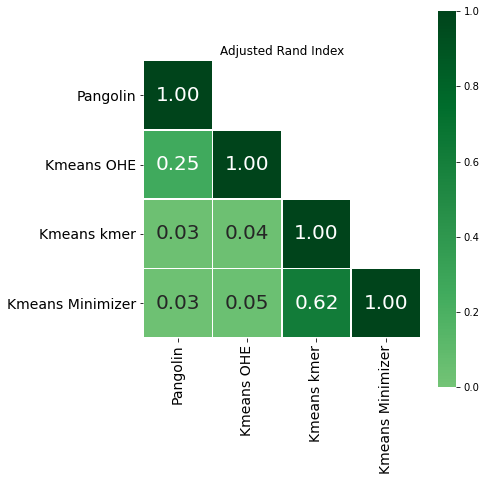

In [51]:
plot_heatmap(ari_score, axis_labels, 'Adjusted Rand Index', file)

# fowlkes_mallows_score

In [23]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(attribute_kmeans_kmers, attribute_kmeans_minimizer)

0.9518090924493303

In [98]:
mallows_score = np.matrix([
[1, 0.4652128973, 0.4318544017, 0.4477269086],
[0.4652128973, 1, 0.570932016, 0.6004680815],
[0.4318544017, 0.570932016, 1, 0.9518090924],
[0.4477269086, 0.6004680815, 0.9518090924, 1]
])


In [99]:
mallows_score

matrix([[1.        , 0.4652129 , 0.4318544 , 0.44772691],
        [0.4652129 , 1.        , 0.57093202, 0.60046808],
        [0.4318544 , 0.57093202, 1.        , 0.95180909],
        [0.44772691, 0.60046808, 0.95180909, 1.        ]])

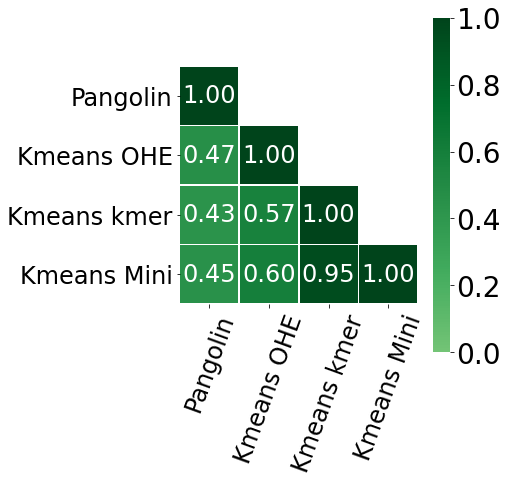

In [132]:
file = "C:/Users/pchourasia1/Desktop/Spring Research 2022/ICCABS/Results/Fowlkes_Mallows_Score.png"
plot_heatmap(mallows_score, axis_labels, 'Fowlkes mallows score', file)

# V_Measure Score

In [34]:
from sklearn.metrics.cluster import v_measure_score
# v_measure_score(attribute_kmeans_kmers, attribute_kmeans_minimizer)
v_measure_score(attribute_kmeans_onehot, attribute_kmeans_minimizer)

0.057709426881846666

In [101]:
v_measure_index = np.matrix([
[1, 0.4386362586, 0.05009876524, 0.06567950726],
[0.4386362586, 1, 0.03831170654, 0.05770942688],
[0.05009876524, 0.03831170654, 1, 0.5369428163],
[0.06567950726, 0.05770942688, 0.5369428163, 1]
])

In [102]:
v_measure_index

matrix([[1.        , 0.43863626, 0.05009877, 0.06567951],
        [0.43863626, 1.        , 0.03831171, 0.05770943],
        [0.05009877, 0.03831171, 1.        , 0.53694282],
        [0.06567951, 0.05770943, 0.53694282, 1.        ]])

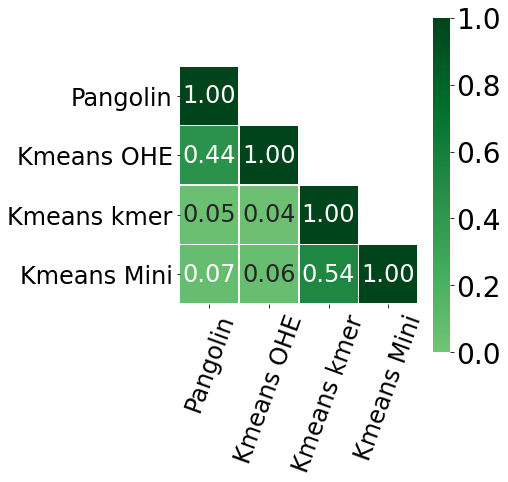

In [133]:
file = "C:/Users/pchourasia1/Desktop/Spring Research 2022/ICCABS/Results/V_Measure_Index.png"
plot_heatmap(v_measure_index, axis_labels, 'V Measure Score', file)

In [44]:
from sklearn.metrics.cluster import completeness_score
# completeness_score(attribute_kmeans_onehot, attribute_kmeans_minimizer) 
# attribute_pangolin
completeness_score(attribute_kmeans_onehot, attribute_pangolin)

0.3770246372571539

In [104]:

Completeness_Score = np.matrix([
[1, 0.3770246373, 0.02992881776, 0.3038423664],
[0.3770246373, 1, 0.02434503574, 0.2000790278],
[0.02992881776, 0.02434503574, 1, 0.700034356],
[0.3038423664, 0.2000790278, 0.700034356, 1]
])

In [105]:
Completeness_Score

matrix([[1.        , 0.37702464, 0.02992882, 0.30384237],
        [0.37702464, 1.        , 0.02434504, 0.20007903],
        [0.02992882, 0.02434504, 1.        , 0.70003436],
        [0.30384237, 0.20007903, 0.70003436, 1.        ]])

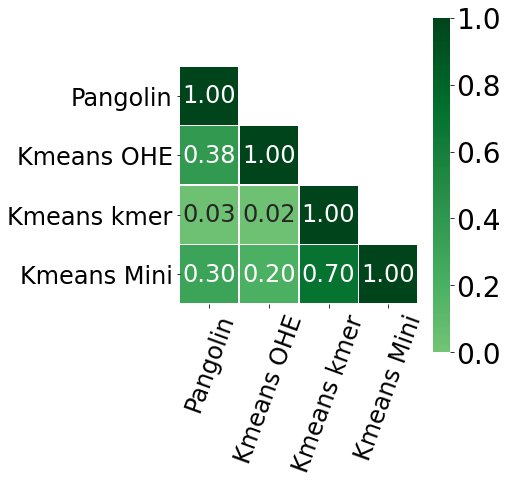

In [134]:
file = "C:/Users/pchourasia1/Desktop/Spring Research 2022/ICCABS/Results/Completeness_Score.png"
plot_heatmap(Completeness_Score, axis_labels, 'Completeness Score', file)